# Activity 7a: Using an Non-Homogeneous system approach with the Laplace Transform

We need to learn how to use the system approach to solving inhomogeneous problems using the Laplace Transform. The first part of this activity (7a) will focus on this issue. The second part (7b) will focus on non-linear systems.

## A simple example

Suppose we have an inhomogeneous ODE like this one:

$$ y'' + 16y = 64t, \,\,\,y(0) = 9, \,\,\, y'(0) = 2 $$

Let's convert this into a system of equations: let $y=y_1$, and $y'=y_2$. Let's work first on the homogeneous part:

$$ y'' + 16y = 0 \rightarrow y'' = -16y $$

or, in terms of $y_1$ and $y_2$ we have:

\begin{align}
y_1' & = y_2 \\
y_2' & = -16 y_1
\end{align}

Then we get:

$$\frac{d}{dt} \begin{bmatrix}{y \\ y'}\end{bmatrix} =
\begin{bmatrix}{y' \\ y''}\end{bmatrix} =
A \begin{bmatrix}{y \\ y'}\end{bmatrix} =
A \begin{bmatrix}y_1 \\ y_2 \end{bmatrix} $$

so we need $A$ to be:

$$\begin{bmatrix}{y' \\ y''}\end{bmatrix} =
A \begin{bmatrix}{y \\ y'}\end{bmatrix} =
\begin{bmatrix}0 & 1 \\ -16 & 0 \end{bmatrix} \begin{bmatrix}{y \\ y'}\end{bmatrix}
$$

So putting in $y=y_1$, and $y'=y_2$ that boils down to:

$$\frac{d}{dt} \begin{bmatrix}{y_1 \\ y_2}\end{bmatrix} =
\begin{bmatrix}0 & 1 \\ -16 & 0 \end{bmatrix} \begin{bmatrix}{y_1 \\ y_2}\end{bmatrix}
$$

Let's take the Laplace Transform of both sides:

$$ s \begin{bmatrix}{Y_1(s) \\ Y_2(s)}\end{bmatrix} - \begin{bmatrix}y_1(0)\\y_2(0)\end{bmatrix} =
\begin{bmatrix}0 & 1 \\ -16 & 0 \end{bmatrix} \begin{bmatrix}{Y_1(s) \\ Y_2(s)}\end{bmatrix}
$$

or in vector notation:

$$ s\vec{Y}(s)-A \vec{Y}(s) = \vec{y}_0 $$

But this is easy to solve!

$$ \vec{Y}(s) = (s-A)^{-1} \vec{y}_0 $$

Can we do this with `sympy`? You bet!


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = sp.Matrix([[0,1],[-16,0]])
y0 = sp.Matrix([9,2])
A,y0

(Matrix([
 [  0, 1],
 [-16, 0]]),
 Matrix([
 [9],
 [2]]))

Let's diagonalize the matrix so we can get a sense of the homogeneous solutions we expect:

In [3]:
P,D = A.diagonalize()
P,D

(Matrix([
 [I, -I],
 [4,  4]]),
 Matrix([
 [-4*I,   0],
 [   0, 4*I]]))

Great! So we have two complex conjugate eigenvalues. We expect sinusoidal solutions. In fact we can completely solve the homogeneous case using the techniques we've encountered before.

In [18]:
t = sp.symbols("t",real=True, positive=True)
y = P*sp.exp(D*t)*P.inv()*y0
y.as_real_imag()[0]

Matrix([
[  sin(4*t)/2 + 9*cos(4*t)],
[-36*sin(4*t) + 2*cos(4*t)]])

How can we solve this same problem with the Laplace Transform? Easy, just use the approach described above. We need to invert the matrix $s-A$ (called `SMA` here.) But wait, $s$ is just a variable, but $A$ is a square matrix. How do we do that? We can convert $s$ into a matrix by multiplying by the identity. This is easiest in sympy using the `diag` function, as shown below, in `sympy`:

In [19]:
s = sp.symbols("s")
SMA = sp.diag(s,s) - A
SMA

Matrix([
[ s, -1],
[16,  s]])

In [20]:
sp.simplify(SMA.inv())

Matrix([
[  s/(s**2 + 16), 1/(s**2 + 16)],
[-16/(s**2 + 16), s/(s**2 + 16)]])

In [21]:
Y = sp.simplify(SMA.inv()*y0)
Y

Matrix([
[ (9*s + 2)/(s**2 + 16)],
[2*(s - 72)/(s**2 + 16)]])

Let's take the inverse transform of the top ($y_1$) component of the resulting vector.

In [22]:
y_1 = sp.inverse_laplace_transform(Y[0],s,t)
y_1

sin(4*t)/2 + 9*cos(4*t)

Not suprisingly it matches the homogenous solution exactly. Good! What about $y_2 = y'$?


In [23]:
y_2 = sp.inverse_laplace_transform(Y[1],s,t)
y_2

-36*sin(4*t) + 2*cos(4*t)

Excellent! But wait, if we just get the same result either way, what's the point? Why not just use the original technique? The reason is we have an *inhomogenous* problem, and the homogeneous solution is only part of that story. Basically, we use the homogeneous solution to deal with the initial conditions, and the Laplace transform to handle the inhomogeneous part. But with this technique, the Laplace Transform actually does it all in one go if we like. Let's redo the analysis from above, but this time, let's include the inhomogeneous part. Our new equations would be:

or, in terms of $y_1$ and $y_2$ we have:

\begin{align}
y_1' & = y_2 + 0\\
y_2' & = -16 y_1 + 64t
\end{align}

or

$$ \frac{d}{dt} \begin{bmatrix} y_1\\ y_2\end{bmatrix} =
\begin{bmatrix}0 & 1 \\ -16 & 0 \end{bmatrix} 
\begin{bmatrix} y_1\\ y_2\end{bmatrix} + 
\begin{bmatrix} 0 \\ 64 t \end{bmatrix} $$

Again, taking the Laplace Transform of both sides we get:

$$ s \begin{bmatrix} Y_1(s)\\ Y_2(s)\end{bmatrix} - \vec{y}_0 =
\begin{bmatrix}0 & 1 \\ -16 & 0 \end{bmatrix} \begin{bmatrix} Y_1(s)\\ Y_2(s)\end{bmatrix} + \mathscr{L}\left( \begin{bmatrix} 0 \\ 64t \end{bmatrix}\right) $$



Or, equivalently, in vector form:

$$ s\vec{Y}(s)-A \vec{Y}(s) = (s-A)\vec{Y}(s) = \vec{y}_0 + \vec{F}(s) $$

Where $\vec{F}(s)$ is the vector form of the Laplace Transform of the inhomogeneous term in the original differential equation:

$$ \vec{F}(s) = \mathscr{L}\left( \begin{bmatrix} 0 \\ 64t \end{bmatrix}\right) $$

This is also quite easy to solve by hitting both sides with $(s-A)^{-1}$:

$$ \vec{Y}(s) = (s-A)^{-1} \vec{y}_0 + (s-A)^{-1} \vec{F}(s) $$

Note that the Laplace Transform $\vec{Y}(s)$ has two separate parts:

1. The Laplace Transform of the solution to the homogeneous problem
2. The Laplace Transform of the solution to the non-homogeneous problem.

We already found (1), so we can just focus on (2) and the add the solutions together, since the Laplace Transform of the sum is just the sum of the Laplace Transforms. Let's focus for the moment on (2):


In [24]:
f2 = 64*t
F2 = sp.laplace_transform(f2,t,s,noconds=True)
F2

64/s**2

In [25]:
F = sp.Matrix([0,F2]) # There is no inhomogeneous forcing function on y itself, just y'
F

Matrix([
[      0],
[64/s**2]])

In [26]:
Yp = sp.simplify(SMA.inv()*F)
Yp

Matrix([
[64/(s**2*(s**2 + 16))],
[   64/(s*(s**2 + 16))]])

In [27]:
yp1 = sp.inverse_laplace_transform(Yp[0],s,t)
yp1

4*t - sin(4*t)

Note that the solution to the inhomogeneous problem is zero at $t=0$, so it means that adding this to the homogeneous solution will not disturb the initial conditions satisfied by the homogeneous solution.

So, the final/complete solution will be:

$$ y(t) = y_1(t) + y_{p1}(t) $$

In [28]:
y = y_1 + yp1
y

4*t - sin(4*t)/2 + 9*cos(4*t)

In [29]:
yp2 = sp.inverse_laplace_transform(Yp[1],s,t) # Let's check the first derivative as well
yp2

4 - 4*cos(4*t)

In [30]:
yprime = y_2 + yp2
yprime

-36*sin(4*t) - 2*cos(4*t) + 4

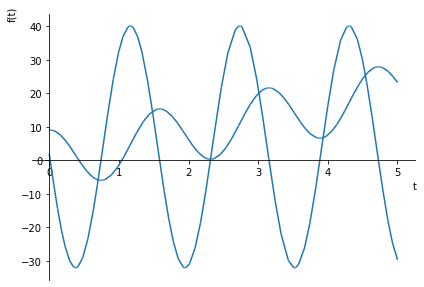

In [31]:
sp.plot(y,yprime,(t,0,5))


Now suppose you have a homework problem that asks you to "Take the Laplace transform of both sides of the given differential equation to create the corresponding algebraic equation. Denote the Laplace transform of $y(t)$ by $Y(s)$. Do not move any terms from one side of the equation to the other (until you get to part (b) below)."

Well, you could do that directly and keep track of all the initial conditions as described in the text:

$$ s^2 Y(s) - s y(0) - y'(0) + 16 Y(s) = \frac{64}{s^2} $$

In the case of this problem you'd get:

$$ s^2 Y(s) - 9s - 2 + 16 Y(s) = \frac{64}{s^2} $$

Which is what the homework system is looking for.

After solving for $Y(s)$ you'd get:

$$ Y(s) = \frac{9s + 2}{s^2 + 16} + \frac{64}{s^2(s^2+16)}$$

But notice, these are *exactly* the homogeneous part `Y[0]` and the particular inhomogeneous part `Yp[0]` from above!


In [32]:
Y[0]

(9*s + 2)/(s**2 + 16)

In [33]:
Yp[0]

64/(s**2*(s**2 + 16))

So the left hand side (LHS) of the Laplace Transform of the original differential equation is just what you have when you multiply through by the characteristic polynomial (in this case $s^2 + 16) and move the homogeneous term to the left side of the equal sign. The right hand side (RHS) is what's left. If you multiply by the characteristic polynomial you get:

$$ (s^2+16)Y(s) = 9s + 2 + \frac{64}{s^2} $$

Then moving the $9s + 2$ over you get:

$$ (s^2+16)Y(s) - 9s - 2  = \frac{64}{s^2} $$

Which you can then use to fill in the homework problem.


# Now it's your turn!

Pick any of the non-homogeneous problems from section 4.8 or 4.9 of Charnley's book. (Feel free to ask if you're not sure if a problem is non-homogeneous!)

1. Translate the problem into a system of equations.
2. Solve the homogeneous problem with either the Laplace Transform or the eigenvector/eigenvalue method of Activities 5a/5b. Use the homogeneous solution to satisfy any non-zero initial conditions.
3. Solve the non-homogeneous problem using the Laplace Transform, as described above in this notebook.
4. Interpret the results. Explain how the homogeneous part of the solution is distinct from the non-homogeneous part.
